In [17]:
import pandas as pd
import requests
import time

# Function to fetch JSON on update-nature
def fetch_update_nature(doi):
    url = f"https://api.labs.crossref.org/works/{doi}?mailto=name@tib.eu"
    response = requests.get(url)
    if response.status_code == 200:
        json_data = response.json()
        updates = json_data.get('message', {}).get('cr-labs-updates', [])
        return ";".join([update.get('update-nature') for update in updates])
    else:
        return ""

# Read CSV file and start from specified line/DOI
csv_filename = "OpenAlex_retractions.csv"
start_line = 0  # Set to the line number/DOI from which to start
batch_size = 200
openalexexport_df = pd.read_csv(csv_filename, skiprows=range(1, start_line), nrows=batch_size)

# Extend DataFrame with update_nature column
openalexexport_df['update_nature'] = openalexexport_df['doi'].apply(fetch_update_nature)

# Export CSV file every X DOIs (batchsize)
while not openalexexport_df.empty:
    export_filename = f"retraction_metadata_{start_line + len(openalexexport_df)}.csv"
    openalexexport_df.to_csv(export_filename, index=False)
    print(f"Exported to {export_filename}")
    time.sleep(2)  # Wait for 2 seconds before exporting next batch
    start_line += batch_size
    openalexexport_df = pd.read_csv(csv_filename, skiprows=range(1, start_line), nrows=batch_size)
    openalexexport_df['update_nature'] = openalexexport_df['doi'].apply(fetch_update_nature)



Exported to retraction_metadata_1.csv
Exported to retraction_metadata_2.csv
Exported to retraction_metadata_3.csv
Exported to retraction_metadata_4.csv
Exported to retraction_metadata_5.csv
Exported to retraction_metadata_6.csv
Exported to retraction_metadata_7.csv
Exported to retraction_metadata_8.csv
Exported to retraction_metadata_9.csv
Exported to retraction_metadata_10.csv
Exported to retraction_metadata_11.csv
Exported to retraction_metadata_12.csv
Exported to retraction_metadata_13.csv
Exported to retraction_metadata_14.csv
Exported to retraction_metadata_15.csv
Exported to retraction_metadata_16.csv
Exported to retraction_metadata_17.csv
Exported to retraction_metadata_18.csv
Exported to retraction_metadata_19.csv
Exported to retraction_metadata_20.csv
Exported to retraction_metadata_21.csv
Exported to retraction_metadata_22.csv
Exported to retraction_metadata_23.csv
Exported to retraction_metadata_24.csv
Exported to retraction_metadata_25.csv
Exported to retraction_metadata_26

KeyboardInterrupt: 

In [7]:
import os

# Get the current working directory
directory = os.getcwd()

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Initialize an empty DataFrame to store merged data
merged_df = pd.DataFrame()

# Iterate over each CSV file and merge data
for csv_file in csv_files:
    df = pd.read_csv(os.path.join(directory, csv_file))
    merged_df = pd.concat([merged_df, df], ignore_index=True)

# Export the merged DataFrame to a single CSV file
merged_filename = "merged_retraction_metadata.csv"
merged_df.to_csv(merged_filename, index=False)

print(f"Merged data exported to {merged_filename}")


Merged data exported to merged_retraction_metadata.csv


In [8]:
print(merged_df.head())

                                 id  \
0  https://openalex.org/W3001195213   
1  https://openalex.org/W1974047233   
2  https://openalex.org/W2118796952   
3  https://openalex.org/W3010930696   
4  https://openalex.org/W2166000498   

                                        display_name  \
0  Detection of 2019 novel coronavirus (2019-nCoV...   
1  DNA methylation age of human tissues and cell ...   
2  Chimeric Antigen Receptor T Cells for Sustaine...   
3  Hydroxychloroquine and azithromycin as a treat...   
4  Primary Prevention of Cardiovascular Disease w...   

                   primary_location_display_name  cited_by_count  \
0                               Eurosurveillance          5665.0   
1              GenomeBiology.com (London. Print)          4466.0   
2            The New England Journal of Medicine          4310.0   
3  International Journal of Antimicrobial Agents          3800.0   
4            The New England Journal of Medicine          3684.0   

                   

In [2]:
# Read the CSV file
csv_filename = "dois_with_update_nature.csv"
df = pd.read_csv(csv_filename)

In [19]:
# Read the CSV file
df = pd.read_csv("pubs_with_update-nature.csv", sep=';')

# Removing rows where update_nature is empty
df = df.dropna(subset=['update_nature'])

# Counting the number of rows including "retraction", which includes "Crossmark Retraction"
retraction_count = df['update_nature'].str.contains('Retraction').sum()


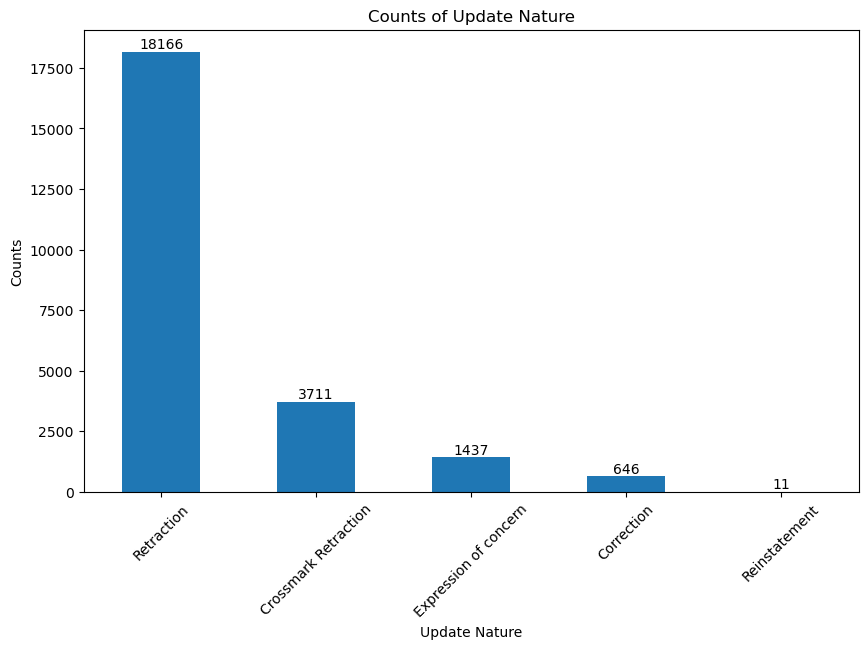

Number of retractions, including Crossmark Retractions: 19391


In [18]:
# Split the values in update_nature and count them individually
all_update_nature_values = df['update_nature'].str.split(';').explode().str.strip()

# Count occurrences of each update nature value
update_nature_counts = all_update_nature_values.value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
ax = update_nature_counts.plot(kind='bar')
plt.title('Counts of Update Nature')
plt.xlabel('Update Nature')
plt.ylabel('Counts')
plt.xticks(rotation=45)

for i, count in enumerate(update_nature_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# Print the retraction count
print("Number of retractions, including Crossmark Retractions:", retraction_count)

In [8]:
df = pd.read_csv("dois_with_update_nature.csv")

total_papers = df['doi'].notnull().sum()
print("Number of papers:", total_papers)

# Split values in 'update_nature' at semicolon
update_nature_split = df['update_nature'].str.split(';')

# Create a new DataFrame where each row corresponds to a single update nature term for each paper
update_nature_df = pd.DataFrame(update_nature_split.explode())

# Count update nature terms
update_nature_counts = update_nature_df['update_nature'].value_counts()
 

print("\nAnalysis of Update Nature:")
print(update_nature_counts)


Number of papers: 20486

Analysis of Update Nature:
Retraction               18166
Crossmark Retraction      3711
Expression of concern     1437
Correction                 646
Reinstatement               11
Name: update_nature, dtype: int64
